In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dissertation/EDbySBODcat.csv')
data

,date_adm,SBoDcate,count
0,01jan2006,Not Categorised,10
1,02jan2006,Not Categorised,17
2,03jan2006,Not Categorised,20
3,04jan2006,Not Categorised,19
4,05jan2006,Not Categorised,9
...,...,...,...
114296,27dec2018,Factors influencing health status and contact ...,18
114297,28dec2018,Factors influencing health status and contact ...,15
114298,29dec2018,Factors influencing health status and contact ...,12
114299,30dec2018,Factors influencing health status and contact ...,14


In [ ]:
a = 0
for i in range(len(data)):
  if type(data['date_adm'][i]) == float:
    data['date_adm'][i] = '31dec2018'
    a += 1
print(a) # how many '31dec2018' are added

<ipython-input-59-8bb847fe5328>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date_adm'][i] = '31dec2018'


17


In [ ]:
data

,date_adm,SBoDcate,count
0,01jan2006,Not Categorised,10
1,02jan2006,Not Categorised,17
2,03jan2006,Not Categorised,20
3,04jan2006,Not Categorised,19
4,05jan2006,Not Categorised,9
...,...,...,...
114296,27dec2018,Factors influencing health status and contact ...,18
114297,28dec2018,Factors influencing health status and contact ...,15
114298,29dec2018,Factors influencing health status and contact ...,12
114299,30dec2018,Factors influencing health status and contact ...,14


In [ ]:
index_first = []
for i in range(len(data)):
  if data['date_adm'][i] == '01jan2006':
    index_first.append(i)

In [ ]:
len(index_first)

25

In [ ]:
dfs = []  # create an empty list to store the new DataFrames

for i in range(len(index_first)-1):
  df = data.iloc[index_first[i]:index_first[i+1]] 
  dfs.append(df)

dfs.append(data.iloc[index_first[24]:])

for i in range(len(dfs)):
  dfs[i].reset_index(drop=True, inplace=True)

In [ ]:
for i in range(len(dfs)):
    new_col_name = dfs[i]['SBoDcate'].iloc[0]  # get the first value of the 'SBoDcate' column
    dfs[i] = dfs[i].rename(columns={'count': new_col_name})

In [ ]:
for i in range(len(dfs)):
  dfs[i] = dfs[i].drop('SBoDcate', axis=1)

因为每个条件下最多有4748个记录。以Infectious and Parasitic Diseases为基准进行merge。

In [ ]:
dfs[1]

,date_adm,Infectious and Parasitic Diseases
0,01jan2006,232
1,02jan2006,251
2,03jan2006,189
3,04jan2006,136
4,05jan2006,163
...,...,...
4743,27dec2018,247
4744,28dec2018,272
4745,29dec2018,234
4746,30dec2018,238


In [ ]:
merged = pd.merge(dfs[1], dfs[0], on='date_adm', how='left')

In [ ]:
for i in range(2, len(dfs)):
  merged = pd.merge(merged, dfs[i], on='date_adm', how='left')

In [ ]:
merged

,date_adm,Infectious and Parasitic Diseases,Not Categorised,Respiratory Infection,Maternal conditions,Perinatal conditions,Nutritional deficiencies,Malignant neoplasms,Other neoplasms,Diabetes mellitus,...,Genitourinary disorders,Skin diseases,Musculoskeletal disease,Congenital Abnormalities,Oral Diseases,Unintentional injuries,Intentional injuries,Ill-defined diseases,Ill-defined injuries/accidents,Factors influencing health status and contact with health services
0,01jan2006,232,10.0,226,2.0,35.0,4.0,19.0,1.0,13,...,64,58,77,1.0,13.0,449.0,13.0,261,2.0,27.0
1,02jan2006,251,17.0,330,3.0,34.0,4.0,12.0,3.0,9,...,77,73,81,NaN,19.0,463.0,16.0,321,5.0,15.0
2,03jan2006,189,20.0,221,5.0,9.0,4.0,9.0,NaN,11,...,87,82,91,1.0,6.0,423.0,19.0,281,2.0,20.0
3,04jan2006,136,19.0,177,2.0,9.0,3.0,16.0,2.0,6,...,67,54,85,1.0,5.0,373.0,24.0,267,2.0,16.0
4,05jan2006,163,9.0,147,6.0,4.0,5.0,14.0,1.0,11,...,73,76,74,NaN,7.0,394.0,30.0,267,1.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4743,27dec2018,247,82.0,396,7.0,8.0,2.0,16.0,2.0,4,...,125,148,212,1.0,17.0,NaN,NaN,673,482.0,18.0
4744,28dec2018,272,92.0,364,9.0,8.0,NaN,13.0,4.0,8,...,94,127,187,1.0,13.0,NaN,NaN,600,511.0,15.0
4745,29dec2018,234,77.0,374,7.0,8.0,NaN,8.0,NaN,11,...,98,91,177,NaN,10.0,NaN,NaN,496,406.0,12.0
4746,30dec2018,238,71.0,393,8.0,19.0,1.0,8.0,1.0,2,...,78,81,161,1.0,14.0,NaN,NaN,419,335.0,14.0


In [ ]:
merged = merged.fillna(0) # replace all the nan values with 0
merged

,date_adm,Infectious and Parasitic Diseases,Not Categorised,Respiratory Infection,Maternal conditions,Perinatal conditions,Nutritional deficiencies,Malignant neoplasms,Other neoplasms,Diabetes mellitus,...,Genitourinary disorders,Skin diseases,Musculoskeletal disease,Congenital Abnormalities,Oral Diseases,Unintentional injuries,Intentional injuries,Ill-defined diseases,Ill-defined injuries/accidents,Factors influencing health status and contact with health services
0,01jan2006,232,10.0,226,2.0,35.0,4.0,19.0,1.0,13,...,64,58,77,1.0,13.0,449.0,13.0,261,2.0,27.0
1,02jan2006,251,17.0,330,3.0,34.0,4.0,12.0,3.0,9,...,77,73,81,0.0,19.0,463.0,16.0,321,5.0,15.0
2,03jan2006,189,20.0,221,5.0,9.0,4.0,9.0,0.0,11,...,87,82,91,1.0,6.0,423.0,19.0,281,2.0,20.0
3,04jan2006,136,19.0,177,2.0,9.0,3.0,16.0,2.0,6,...,67,54,85,1.0,5.0,373.0,24.0,267,2.0,16.0
4,05jan2006,163,9.0,147,6.0,4.0,5.0,14.0,1.0,11,...,73,76,74,0.0,7.0,394.0,30.0,267,1.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4743,27dec2018,247,82.0,396,7.0,8.0,2.0,16.0,2.0,4,...,125,148,212,1.0,17.0,0.0,0.0,673,482.0,18.0
4744,28dec2018,272,92.0,364,9.0,8.0,0.0,13.0,4.0,8,...,94,127,187,1.0,13.0,0.0,0.0,600,511.0,15.0
4745,29dec2018,234,77.0,374,7.0,8.0,0.0,8.0,0.0,11,...,98,91,177,0.0,10.0,0.0,0.0,496,406.0,12.0
4746,30dec2018,238,71.0,393,8.0,19.0,1.0,8.0,1.0,2,...,78,81,161,1.0,14.0,0.0,0.0,419,335.0,14.0


convert to epi week
2006

In [ ]:
for i in range(len(merged)):
  if merged['date_adm'][i] == '01jan2006' or merged['date_adm'][i] == '30dec2006':
    print(i)

0
363


In [ ]:
# epi weeks:52
group_num = 1
for i in range(0, 364, 7):
    merged.loc[i:i+6, 'date_adm'] = '2006_{:02d}'.format(group_num)
    group_num += 1

In [ ]:
merged['date_adm'][364]

'31dec2006'

2007

In [ ]:
for i in range(len(merged)):
  if merged['date_adm'][i] == '31dec2006' or merged['date_adm'][i] == '29dec2007':
    print(i)

364
727


In [ ]:
group_num = 1
for i in range(364, 728, 7):
    merged.loc[i:i+6, 'date_adm'] = '2007_{:02d}'.format(group_num)
    group_num += 1

In [ ]:
merged['date_adm'][728]

'30dec2007'

2008

In [ ]:
for i in range(len(merged)):
  if merged['date_adm'][i] == '30dec2007' or merged['date_adm'][i] == '03jan2009':
    print(i)

728
1098


In [ ]:
group_num = 1
for i in range(728, 1099, 7):
    merged.loc[i:i+6, 'date_adm'] = '2008_{:02d}'.format(group_num)
    group_num += 1

In [ ]:
merged['date_adm'][1099]

'04jan2009'

2009

In [ ]:
for i in range(len(merged)):
  if merged['date_adm'][i] == '04jan2009' or merged['date_adm'][i] == '02jan2010':
    print(i)

1099
1462


In [ ]:
group_num = 1
for i in range(1099, 1463, 7):
    merged.loc[i:i+6, 'date_adm'] = '2009_{:02d}'.format(group_num)
    group_num += 1

In [ ]:
merged['date_adm'][1463]

'03jan2010'

2010

In [ ]:
for i in range(len(merged)):
  if merged['date_adm'][i] == '03jan2010' or merged['date_adm'][i] == '01jan2011':
    print(i)

1463
1826


In [ ]:
group_num = 1
for i in range(1463, 1827, 7):
    merged.loc[i:i+6, 'date_adm'] = '2010_{:02d}'.format(group_num)
    group_num += 1

2011

In [ ]:
for i in range(len(merged)):
  if merged['date_adm'][i] == '02jan2011' or merged['date_adm'][i] == '31dec2011':
    print(i)

1827
2190


In [ ]:
group_num = 1
for i in range(1827, 2191, 7):
    merged.loc[i:i+6, 'date_adm'] = '2011_{:02d}'.format(group_num)
    group_num += 1

2012

In [ ]:
for i in range(len(merged)):
  if merged['date_adm'][i] == '01jan2012' or merged['date_adm'][i] == '29dec2012':
    print(i)

2191
2554


In [ ]:
group_num = 1
for i in range(2191, 2555, 7):
    merged.loc[i:i+6, 'date_adm'] = '2012_{:02d}'.format(group_num)
    group_num += 1

2013

In [ ]:
for i in range(len(merged)):
  if merged['date_adm'][i] == '30dec2012' or merged['date_adm'][i] == '28dec2013':
    print(i)

2555
2918


In [ ]:
group_num = 1
for i in range(2555, 2919, 7):
    merged.loc[i:i+6, 'date_adm'] = '2013_{:02d}'.format(group_num)
    group_num += 1

2014

In [ ]:
for i in range(len(merged)):
  if merged['date_adm'][i] == '29dec2013' or merged['date_adm'][i] == '03jan2015':
    print(i)

2919
3289


In [ ]:
group_num = 1
for i in range(2919, 3290, 7):
    merged.loc[i:i+6, 'date_adm'] = '2014_{:02d}'.format(group_num)
    group_num += 1

2015

In [ ]:
for i in range(len(merged)):
  if merged['date_adm'][i] == '04jan2015' or merged['date_adm'][i] == '02jan2016':
    print(i)

3290
3653


In [ ]:
group_num = 1
for i in range(3290, 3654, 7):
    merged.loc[i:i+6, 'date_adm'] = '2015_{:02d}'.format(group_num)
    group_num += 1

2016

In [ ]:
for i in range(len(merged)):
  if merged['date_adm'][i] == '03jan2016' or merged['date_adm'][i] == '31dec2016':
    print(i)

3654
4017


In [ ]:
group_num = 1
for i in range(3654, 4018, 7):
    merged.loc[i:i+6, 'date_adm'] = '2016_{:02d}'.format(group_num)
    group_num += 1

2017

In [ ]:
for i in range(len(merged)):
  if merged['date_adm'][i] == '01jan2017' or merged['date_adm'][i] == '30dec2017':
    print(i)

4018
4381


In [ ]:
group_num = 1
for i in range(4018, 4382, 7):
    merged.loc[i:i+6, 'date_adm'] = '2017_{:02d}'.format(group_num)
    group_num += 1

2018

In [ ]:
for i in range(len(merged)):
  if merged['date_adm'][i] == '31dec2017' or merged['date_adm'][i] == '29dec2018':
    print(i)

4382
4745


In [ ]:
group_num = 1
for i in range(4382, 4746, 7):
    merged.loc[i:i+6, 'date_adm'] = '2018_{:02d}'.format(group_num)
    group_num += 1

In [ ]:
merged = merged.rename(columns={'date_adm': 'Epic_week'})
merged

,Epic_week,Infectious and Parasitic Diseases,Not Categorised,Respiratory Infection,Maternal conditions,Perinatal conditions,Nutritional deficiencies,Malignant neoplasms,Other neoplasms,Diabetes mellitus,...,Genitourinary disorders,Skin diseases,Musculoskeletal disease,Congenital Abnormalities,Oral Diseases,Unintentional injuries,Intentional injuries,Ill-defined diseases,Ill-defined injuries/accidents,Factors influencing health status and contact with health services
0,2006_01,232,10.0,226,2.0,35.0,4.0,19.0,1.0,13,...,64,58,77,1.0,13.0,449.0,13.0,261,2.0,27.0
1,2006_01,251,17.0,330,3.0,34.0,4.0,12.0,3.0,9,...,77,73,81,0.0,19.0,463.0,16.0,321,5.0,15.0
2,2006_01,189,20.0,221,5.0,9.0,4.0,9.0,0.0,11,...,87,82,91,1.0,6.0,423.0,19.0,281,2.0,20.0
3,2006_01,136,19.0,177,2.0,9.0,3.0,16.0,2.0,6,...,67,54,85,1.0,5.0,373.0,24.0,267,2.0,16.0
4,2006_01,163,9.0,147,6.0,4.0,5.0,14.0,1.0,11,...,73,76,74,0.0,7.0,394.0,30.0,267,1.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4743,2018_52,247,82.0,396,7.0,8.0,2.0,16.0,2.0,4,...,125,148,212,1.0,17.0,0.0,0.0,673,482.0,18.0
4744,2018_52,272,92.0,364,9.0,8.0,0.0,13.0,4.0,8,...,94,127,187,1.0,13.0,0.0,0.0,600,511.0,15.0
4745,2018_52,234,77.0,374,7.0,8.0,0.0,8.0,0.0,11,...,98,91,177,0.0,10.0,0.0,0.0,496,406.0,12.0
4746,30dec2018,238,71.0,393,8.0,19.0,1.0,8.0,1.0,2,...,78,81,161,1.0,14.0,0.0,0.0,419,335.0,14.0


In [ ]:
merged = merged.iloc[0:4746]
merged

,Epic_week,Infectious and Parasitic Diseases,Not Categorised,Respiratory Infection,Maternal conditions,Perinatal conditions,Nutritional deficiencies,Malignant neoplasms,Other neoplasms,Diabetes mellitus,...,Genitourinary disorders,Skin diseases,Musculoskeletal disease,Congenital Abnormalities,Oral Diseases,Unintentional injuries,Intentional injuries,Ill-defined diseases,Ill-defined injuries/accidents,Factors influencing health status and contact with health services
0,2006_01,232,10.0,226,2.0,35.0,4.0,19.0,1.0,13,...,64,58,77,1.0,13.0,449.0,13.0,261,2.0,27.0
1,2006_01,251,17.0,330,3.0,34.0,4.0,12.0,3.0,9,...,77,73,81,0.0,19.0,463.0,16.0,321,5.0,15.0
2,2006_01,189,20.0,221,5.0,9.0,4.0,9.0,0.0,11,...,87,82,91,1.0,6.0,423.0,19.0,281,2.0,20.0
3,2006_01,136,19.0,177,2.0,9.0,3.0,16.0,2.0,6,...,67,54,85,1.0,5.0,373.0,24.0,267,2.0,16.0
4,2006_01,163,9.0,147,6.0,4.0,5.0,14.0,1.0,11,...,73,76,74,0.0,7.0,394.0,30.0,267,1.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2018_52,378,104.0,576,5.0,33.0,0.0,9.0,3.0,5,...,102,128,173,1.0,13.0,0.0,0.0,592,479.0,14.0
4742,2018_52,303,103.0,445,6.0,15.0,1.0,12.0,2.0,6,...,128,161,219,0.0,11.0,0.0,0.0,668,481.0,22.0
4743,2018_52,247,82.0,396,7.0,8.0,2.0,16.0,2.0,4,...,125,148,212,1.0,17.0,0.0,0.0,673,482.0,18.0
4744,2018_52,272,92.0,364,9.0,8.0,0.0,13.0,4.0,8,...,94,127,187,1.0,13.0,0.0,0.0,600,511.0,15.0


In [ ]:
# # By daily
# merged.to_csv('merged_daily.csv', index=False)

In [ ]:
merged_grouped = merged.groupby(by='Epic_week', as_index=False).sum()
merged_grouped

,Epic_week,Infectious and Parasitic Diseases,Not Categorised,Respiratory Infection,Maternal conditions,Perinatal conditions,Nutritional deficiencies,Malignant neoplasms,Other neoplasms,Diabetes mellitus,...,Genitourinary disorders,Skin diseases,Musculoskeletal disease,Congenital Abnormalities,Oral Diseases,Unintentional injuries,Intentional injuries,Ill-defined diseases,Ill-defined injuries/accidents,Factors influencing health status and contact with health services
0,2006_01,1306,103.0,1437,26.0,103.0,31.0,95.0,11.0,70,...,493,486,534,5.0,63.0,2870.0,144.0,1876,18.0,137.0
1,2006_02,1209,98.0,1370,21.0,83.0,27.0,80.0,10.0,90,...,445,460,472,2.0,45.0,2846.0,147.0,1740,35.0,105.0
2,2006_03,1115,103.0,1636,27.0,57.0,25.0,72.0,9.0,90,...,430,487,523,5.0,43.0,2959.0,144.0,1807,21.0,105.0
3,2006_04,1083,115.0,1785,29.0,60.0,30.0,86.0,8.0,62,...,392,479,494,2.0,41.0,2891.0,133.0,1813,32.0,121.0
4,2006_05,1340,108.0,2244,36.0,152.0,31.0,98.0,10.0,85,...,494,643,526,9.0,99.0,2870.0,138.0,1905,22.0,108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,2018_48,1711,587.0,2694,47.0,75.0,2.0,75.0,14.0,53,...,765,854,1461,2.0,91.0,0.0,0.0,4384,3395.0,120.0
674,2018_49,1389,598.0,2224,34.0,47.0,2.0,62.0,13.0,48,...,630,715,1264,7.0,67.0,0.0,0.0,3631,2932.0,96.0
675,2018_50,1621,605.0,2712,30.0,76.0,0.0,77.0,19.0,46,...,730,799,1496,7.0,73.0,0.0,0.0,4290,3250.0,136.0
676,2018_51,1749,596.0,2801,50.0,83.0,4.0,60.0,19.0,54,...,756,866,1390,8.0,60.0,0.0,0.0,4336,3263.0,128.0


In [ ]:
# merged_grouped.to_csv('merged_by_Eweek_sum.csv',index=False)

In [ ]:
df = merged_grouped[['Epic_week', 'Infectious and Parasitic Diseases', 'Respiratory Infection']]
df

,Epic_week,Infectious and Parasitic Diseases,Respiratory Infection
0,2006_01,1306,1437
1,2006_02,1209,1370
2,2006_03,1115,1636
3,2006_04,1083,1785
4,2006_05,1340,2244
...,...,...,...
673,2018_48,1711,2694
674,2018_49,1389,2224
675,2018_50,1621,2712
676,2018_51,1749,2801


### Processing of weather_day.csv

In [ ]:
weather = pd.read_csv('/content/drive/MyDrive/dissertation/weather_day.csv')
weather

,Date,Year,Month,Day,Daily_Rainfall_Total_mm,Highest_30_Min_Rainfall_mm,Highest_60_Min_Rainfall_mm,Highest_120_Min_Rainfall_mm,Mean_Temperature_C,Maximum_Temperature_C,Minimum_Temperature_C,Mean_Wind_Speed_kmh,Max_Wind_Speed_kmh
0,1999_01_01,1999,1,1,4.223077,0.0,0.0,0.0,25.000,29.62,22.28,6.900000,28.800000
1,1999_01_02,1999,1,2,1.534615,0.0,0.0,0.0,24.250,25.38,23.24,8.580000,23.000000
2,1999_01_03,1999,1,3,0.619231,0.0,0.0,0.0,25.375,28.80,23.08,10.260000,32.400000
3,1999_01_04,1999,1,4,9.619231,0.0,0.0,0.0,25.625,30.60,22.84,8.100000,29.200000
4,1999_01_05,1999,1,5,22.292308,0.0,0.0,0.0,25.600,30.76,23.44,6.040000,27.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8730,2022_11_26,2022,11,26,0.164000,0.0,0.0,0.0,28.100,32.50,25.30,6.078947,22.710526
8731,2022_11_27,2022,11,27,3.296000,0.0,0.0,0.0,26.500,29.50,24.50,5.852632,43.226316
8732,2022_11_28,2022,11,28,11.654000,0.0,0.0,0.0,27.400,33.20,24.30,6.673684,32.973684
8733,2022_11_29,2022,11,29,20.034000,0.0,0.0,0.0,27.600,33.30,24.80,6.105263,36.021053


In [ ]:
for i in range(len(weather)):
  if weather['Date'][i] == '2006_01_01' or weather['Date'][i] == '2018_12_29':
    print(i)

2557
7302


In [ ]:
weather = weather.iloc[2557:7303]

In [ ]:
weather.reset_index(drop=True, inplace=True)
weather

,Date,Year,Month,Day,Daily_Rainfall_Total_mm,Highest_30_Min_Rainfall_mm,Highest_60_Min_Rainfall_mm,Highest_120_Min_Rainfall_mm,Mean_Temperature_C,Maximum_Temperature_C,Minimum_Temperature_C,Mean_Wind_Speed_kmh,Max_Wind_Speed_kmh
0,2006_01_01,2006,1,1,21.584615,0.000000,0.000000,0.000000,25.575000,31.100000,23.860000,6.980000,33.100000
1,2006_01_02,2006,1,2,4.946154,0.000000,0.000000,0.000000,25.975000,29.120000,23.720000,7.220000,22.000000
2,2006_01_03,2006,1,3,1.576923,0.000000,0.000000,0.000000,27.275000,32.480000,23.720000,7.260000,24.800000
3,2006_01_04,2006,1,4,20.188462,0.000000,0.000000,0.000000,25.375000,30.220000,22.660000,6.640000,20.900000
4,2006_01_05,2006,1,5,22.369231,0.000000,0.000000,0.000000,25.700000,30.900000,23.440000,7.880000,31.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2018_12_25,2018,12,25,0.084211,0.084211,0.084211,0.084211,28.600000,32.494118,25.723529,7.323529,37.988235
4742,2018_12_26,2018,12,26,2.324561,1.842105,2.214035,2.249123,28.352941,32.568421,23.621053,10.078947,42.878947
4743,2018_12_27,2018,12,27,0.010526,0.010526,0.010526,0.010526,27.858824,30.621053,25.521053,8.126316,30.305263
4744,2018_12_28,2018,12,28,0.000000,0.000000,0.000000,0.000000,29.241176,33.163158,26.121053,9.426316,34.136842


In [ ]:
# convert to Eweek
group_num = 1
for i in range(0, 364, 7):
    weather.loc[i:i+6, 'Date'] = '2006_{:02d}'.format(group_num)
    group_num += 1

In [ ]:
group_num = 1
for i in range(364, 728, 7):
    weather.loc[i:i+6, 'Date'] = '2007_{:02d}'.format(group_num)
    group_num += 1

In [ ]:
group_num = 1
for i in range(728, 1099, 7):
    weather.loc[i:i+6, 'Date'] = '2008_{:02d}'.format(group_num)
    group_num += 1

In [ ]:
group_num = 1
for i in range(1099, 1463, 7):
    weather.loc[i:i+6, 'Date'] = '2009_{:02d}'.format(group_num)
    group_num += 1

In [ ]:
group_num = 1
for i in range(1463, 1827, 7):
    weather.loc[i:i+6, 'Date'] = '2010_{:02d}'.format(group_num)
    group_num += 1

In [ ]:
group_num = 1
for i in range(1827, 2191, 7):
    weather.loc[i:i+6, 'Date'] = '2011_{:02d}'.format(group_num)
    group_num += 1

In [ ]:
group_num = 1
for i in range(2191, 2555, 7):
    weather.loc[i:i+6, 'Date'] = '2012_{:02d}'.format(group_num)
    group_num += 1

In [ ]:
group_num = 1
for i in range(2555, 2919, 7):
    weather.loc[i:i+6, 'Date'] = '2013_{:02d}'.format(group_num)
    group_num += 1

In [ ]:
group_num = 1
for i in range(2919, 3290, 7):
    weather.loc[i:i+6, 'Date'] = '2014_{:02d}'.format(group_num)
    group_num += 1

In [ ]:
group_num = 1
for i in range(3290, 3654, 7):
    weather.loc[i:i+6, 'Date'] = '2015_{:02d}'.format(group_num)
    group_num += 1

In [ ]:
group_num = 1
for i in range(3654, 4018, 7):
    weather.loc[i:i+6, 'Date'] = '2016_{:02d}'.format(group_num)
    group_num += 1

In [ ]:
group_num = 1
for i in range(4018, 4382, 7):
    weather.loc[i:i+6, 'Date'] = '2017_{:02d}'.format(group_num)
    group_num += 1

In [ ]:
group_num = 1
for i in range(4382, len(weather), 7):
    weather.loc[i:i+6, 'Date'] = '2018_{:02d}'.format(group_num)
    group_num += 1

In [ ]:
weather

,Date,Year,Month,Day,Daily_Rainfall_Total_mm,Highest_30_Min_Rainfall_mm,Highest_60_Min_Rainfall_mm,Highest_120_Min_Rainfall_mm,Mean_Temperature_C,Maximum_Temperature_C,Minimum_Temperature_C,Mean_Wind_Speed_kmh,Max_Wind_Speed_kmh
0,2006_01,2006,1,1,21.584615,0.000000,0.000000,0.000000,25.575000,31.100000,23.860000,6.980000,33.100000
1,2006_01,2006,1,2,4.946154,0.000000,0.000000,0.000000,25.975000,29.120000,23.720000,7.220000,22.000000
2,2006_01,2006,1,3,1.576923,0.000000,0.000000,0.000000,27.275000,32.480000,23.720000,7.260000,24.800000
3,2006_01,2006,1,4,20.188462,0.000000,0.000000,0.000000,25.375000,30.220000,22.660000,6.640000,20.900000
4,2006_01,2006,1,5,22.369231,0.000000,0.000000,0.000000,25.700000,30.900000,23.440000,7.880000,31.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2018_52,2018,12,25,0.084211,0.084211,0.084211,0.084211,28.600000,32.494118,25.723529,7.323529,37.988235
4742,2018_52,2018,12,26,2.324561,1.842105,2.214035,2.249123,28.352941,32.568421,23.621053,10.078947,42.878947
4743,2018_52,2018,12,27,0.010526,0.010526,0.010526,0.010526,27.858824,30.621053,25.521053,8.126316,30.305263
4744,2018_52,2018,12,28,0.000000,0.000000,0.000000,0.000000,29.241176,33.163158,26.121053,9.426316,34.136842


In [ ]:
# # By daily
# weather.to_csv('weather_daily.csv', index=False)

In [ ]:
df_w = weather[['Date', 'Daily_Rainfall_Total_mm', 'Mean_Temperature_C', 'Mean_Wind_Speed_kmh']]
df_w

,Date,Daily_Rainfall_Total_mm,Mean_Temperature_C,Mean_Wind_Speed_kmh
0,2006_01,21.584615,25.575000,6.980000
1,2006_01,4.946154,25.975000,7.220000
2,2006_01,1.576923,27.275000,7.260000
3,2006_01,20.188462,25.375000,6.640000
4,2006_01,22.369231,25.700000,7.880000
...,...,...,...,...
4741,2018_52,0.084211,28.600000,7.323529
4742,2018_52,2.324561,28.352941,10.078947
4743,2018_52,0.010526,27.858824,8.126316
4744,2018_52,0.000000,29.241176,9.426316


In [ ]:
df_w = df_w.groupby(by='Date', as_index=False).mean()
df_w

,Date,Daily_Rainfall_Total_mm,Mean_Temperature_C,Mean_Wind_Speed_kmh
0,2006_01,20.071978,25.928571,7.731429
1,2006_02,33.892308,25.142857,10.257143
2,2006_03,6.319780,26.700000,7.605714
3,2006_04,1.977473,26.930952,13.591429
4,2006_05,0.655495,27.189286,14.111429
...,...,...,...,...
673,2018_48,8.778947,27.619328,6.638137
674,2018_49,9.319298,27.169853,6.130859
675,2018_50,10.119799,27.022111,6.675198
676,2018_51,4.597494,27.792700,7.526247


In [ ]:
df_w = df_w.rename(columns={'Date': 'Epic_week'})
df_w

,Epic_week,Daily_Rainfall_Total_mm,Mean_Temperature_C,Mean_Wind_Speed_kmh
0,2006_01,20.071978,25.928571,7.731429
1,2006_02,33.892308,25.142857,10.257143
2,2006_03,6.319780,26.700000,7.605714
3,2006_04,1.977473,26.930952,13.591429
4,2006_05,0.655495,27.189286,14.111429
...,...,...,...,...
673,2018_48,8.778947,27.619328,6.638137
674,2018_49,9.319298,27.169853,6.130859
675,2018_50,10.119799,27.022111,6.675198
676,2018_51,4.597494,27.792700,7.526247


In [ ]:
variables = pd.merge(df, df_w, on='Epic_week', how='inner')

In [ ]:
variables

,Epic_week,Infectious and Parasitic Diseases,Respiratory Infection,Daily_Rainfall_Total_mm,Mean_Temperature_C,Mean_Wind_Speed_kmh
0,2006_01,1306,1437,20.071978,25.928571,7.731429
1,2006_02,1209,1370,33.892308,25.142857,10.257143
2,2006_03,1115,1636,6.319780,26.700000,7.605714
3,2006_04,1083,1785,1.977473,26.930952,13.591429
4,2006_05,1340,2244,0.655495,27.189286,14.111429
...,...,...,...,...,...,...
673,2018_48,1711,2694,8.778947,27.619328,6.638137
674,2018_49,1389,2224,9.319298,27.169853,6.130859
675,2018_50,1621,2712,10.119799,27.022111,6.675198
676,2018_51,1749,2801,4.597494,27.792700,7.526247


In [ ]:
variables.to_csv('variables.csv', index=False)

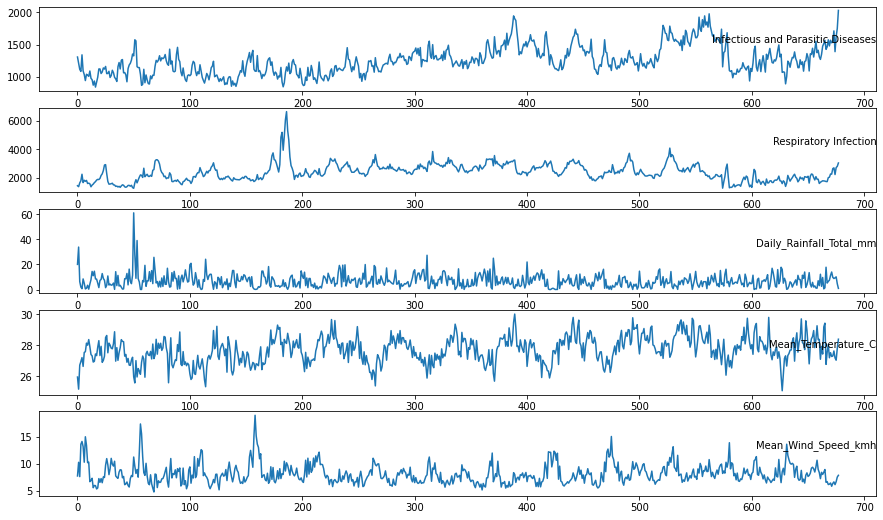

In [ ]:
draw = variables.drop("Epic_week", axis = 1) #去掉No列
values = draw.values #数值特征变量
groups = [0, 1, 2, 3, 4]
i = 1
plt.figure(figsize=(15,9)) #新建画布
for group in groups:
    plt.subplot(len(groups), 1, i) #子图
    plt.plot(values[:, group]) #折线图
    plt.title(draw.columns[group], y = 0.5, fontsize = 10, loc = "right") #取字段为子图标题
    i +=1
plt.show()